### Criando um modelo de Regressão
- Objetivo: conseguir prever o preço das casas da Califórnia
    - Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

### Importando a base

In [6]:
# Importando a base
from sklearn.datasets import fetch_california_housing
retorno = fetch_california_housing()

In [7]:
# Transformando em um DataFrame
import pandas as pd
casas = pd.DataFrame(retorno.data)
casas.columns = retorno.feature_names
casas['MedHouseVal'] = retorno.target
casas.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# Criando novamente as variáveis X e y
X = casas.drop('MedHouseVal',axis=1)
y = casas.MedHouseVal

In [9]:
# Tratando os dados
casas = casas[casas.AveRooms < 100]

### Separando em treino e teste
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
casas.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [12]:
X = casas.drop('MedHouseVal',axis=1)
y = casas.MedHouseVal

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Utilizando a Regressão Linear Simples
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [14]:
# Criando nossa regressão e fazendo o fit com os dados
from sklearn.linear_model import LinearRegression

In [15]:
# Usando o for para fazer a regressão de todas as colunas
lista = X_train.columns

for i in lista:
    print(i)
    RegSim3 = LinearRegression().fit(X_train[i].values.reshape(-1,1), y_train)
    print(RegSim3.score(X_train[i].values.reshape(-1,1), y_train))
    print(RegSim3.score(X_test[i].values.reshape(-1,1), y_test))    

MedInc
0.4722764318735512
0.4780251100283853
HouseAge
0.009901923713279026
0.01435329520341111
AveRooms
0.027892442711821674
0.033409092499478765
AveBedrms
0.0039958828973664096
0.004431841062501274
Population
0.0004691454405161277
0.0005852769184258033
AveOccup
0.000999915854954958
-0.0037063533253798298
Latitude
0.021513560930008224
0.018471709820245708
Longitude
0.0017303702792554887
0.002805043235198257


### O r2_score do Scikit-Learn
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2_score#sklearn.metrics.r2_score

In [35]:
# Criando o modelo para o AveOccup
from sklearn.metrics import r2_score
RegSim4 = LinearRegression().fit(X_train.AveOccup.values.reshape(-1,1), y_train)

In [37]:
# Avaliando o score
print(RegSim4.score(X_train.AveOccup.values.reshape(-1,1), y_train))
print(RegSim4.score(X_test.AveOccup.values.reshape(-1,1), y_test))

0.000999915854954958
-0.0037063533253798298


In [39]:
predict_test = RegSim4.predict(X_test.AveOccup.values.reshape(-1,1))
predict_treino = RegSim4.predict(X_train.AveOccup.values.reshape(-1,1))

In [40]:
# Usando o r2_score do Scikit-Learn
r2_score(y_train, predict_treino)

0.000999915854954958

In [41]:
r2_score(y_test, predict_test)

-0.0037063533253798298

**Entendendo o coeficiente de determinação**

In [44]:
x = [1,2,3,4]
y_true1 = [2.5,2.4,2.7,2.8]
y_true2 = [2.5,2.5,2.7,2.8]
y_pred = [2.3,2.5,2.7,2.9]

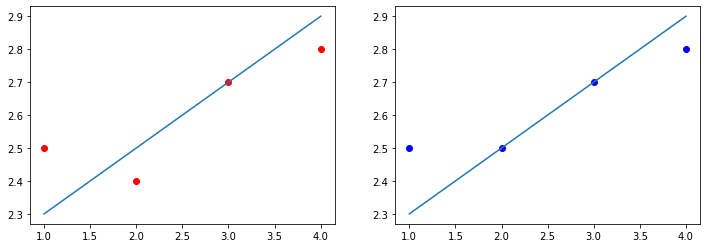

In [45]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,figsize=(12,4))

ax[0].scatter(x,y_true1,c='r')
ax[0].plot(x,y_pred)
ax[1].scatter(x,y_true2,c='b')
ax[1].plot(x,y_pred)

plt.show()

In [46]:
# Gerando o r2_score para os 2 conjuntos de dados
print(r2_score(y_true1,y_pred))
print(r2_score(y_true2,y_pred))

0.399999999999999
0.2592592592592575


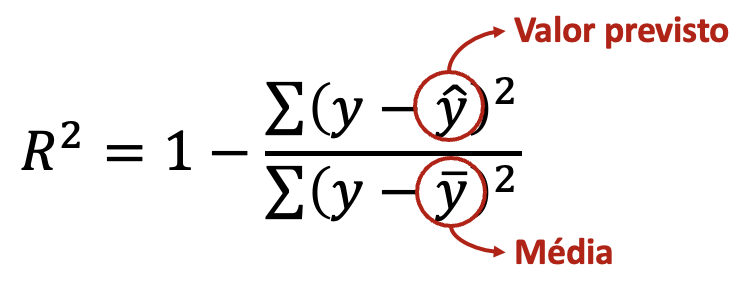

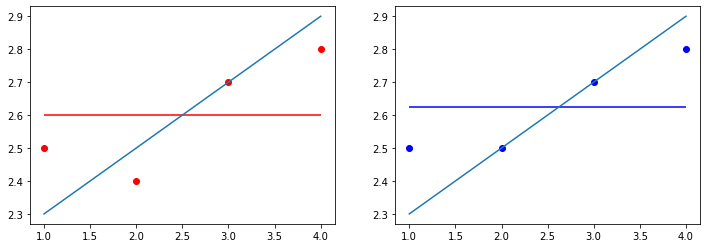

In [31]:
import numpy as np
fig,ax = plt.subplots(ncols=2,figsize=(12,4))

ax[0].scatter(x,y_true1,c='r')
ax[0].plot(x,y_pred)
ax[0].hlines(y=np.mean(y_true1),xmin=1,xmax=4,color='r')
ax[1].scatter(x,y_true2,c='b')
ax[1].plot(x,y_pred)
ax[1].hlines(y=np.mean(y_true2),xmin=1,xmax=4,color='b')

plt.show()